In [1]:
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
import cv2
from pathlib import Path

2024-11-12 21:36:11.936746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-12 21:36:11.955276: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-12 21:36:11.960565: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-12 21:36:11.974011: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
paths = ["covid-19/Normal", "covid-19/COVID19"]
imgs = []
labels = []

for idx, path in enumerate(paths):
    path_images = Path(path).glob("**/*.jpg")
    path_images = [str(x) for x in path_images]
    for path_image in path_images:
        img = cv2.imread(path_image, 0)
        img = img/255
        imgs.append(cv2.resize(img, (150, 150), cv2.INTER_AREA))
    labels.extend([idx]*len(imgs))

imgs = np.array(imgs)
labels = np.array(labels)

imgs = np.expand_dims(imgs,axis=-1)

print(f"Images shape: {imgs.shape}")
print(f"Num of labels: {len(labels)}")




Images shape: (60, 150, 150, 1)
Num of labels: 90


In [3]:
X_train = imgs
y_train = labels



print(f"Imagenes de entrenamiento: {X_train.shape}")
print(f"Numero de clases: {np.unique(y_train)}")

Imagenes de entrenamiento: (60, 150, 150, 1)
Numero de clases: [0 1]


<function matplotlib.pyplot.show(close=None, block=None)>

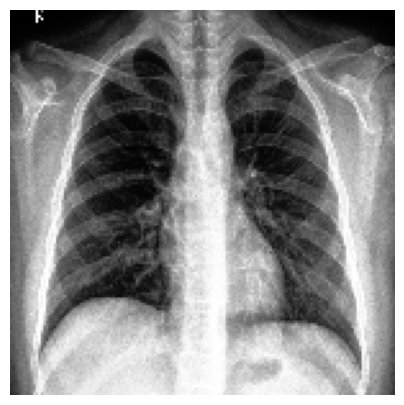

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(X_train[0,:,:], cmap="gray")
plt.axis("off")
plt.show

In [ ]:
model = keras.Sequential([
    keras.layers.Input((150,150,1)),
    #keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, 3, padding="same", strides=1, activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2, activation="softmax")
    
])

ValueError: Input 0 of layer "global_average_pooling2d_1" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 180000)

In [6]:
X_train = np.expand_dims(X_train, axis=-1)
print(X_train.shape)

(60, 150, 150, 1, 1)


In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=optimizer, metrics=["accuracy"])


In [8]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, verbose=1, batch_size=20)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 0.4979 - loss: 1.1875 - val_accuracy: 1.0000 - val_loss: 0.3038
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.5354 - loss: 0.7240 - val_accuracy: 0.7500 - val_loss: 0.4774
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.8479 - loss: 0.4224 - val_accuracy: 0.3333 - val_loss: 1.0541
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.7479 - loss: 0.4741 - val_accuracy: 0.7500 - val_loss: 0.4627
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.8979 - loss: 0.3131 - val_accuracy: 0.8333 - val_loss: 0.3015
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 388ms/step - accuracy: 0.9563 - loss: 0.2352 - val_accuracy: 0.7500 - val_loss: 0.4671
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.8958 - loss: 0.2807 - val_accuracy: 0.7500 - val_loss: 0.3792
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.9542 - loss: 0.1856 - val_accuracy: 0.8333 - v

In [9]:
paths = ["covid-19/Normal", "covid-19/COVID19"]
imgs = []
labels = []

for idx, path in enumerate(paths):
    path_images = Path(path).glob("**/*.jpg")
    path_images = [str(x) for x in path_images]
    for path_image in path_images:
        img = cv2.imread(path_image, 0)
        img = img/255
        imgs.append(cv2.resize(img, (150, 150), cv2.INTER_AREA))
        labels.append(idx)

imgst = np.array(imgs)
imgst = np.expand_dims(imgs,axis=-1)
labelst = np.array(labels)


In [11]:
X_test = imgst
y_test = labelst

predictions = model.predict(X_test)
prediction = np.argmax(predictions, axis=1)

print((prediction == y_test).sum() / len(y_test) * 100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
96.66666666666667


In [12]:
model.save("modelo.h5")